# Recommendation Systems (Collaborative Filtering)

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
np.random.seed(42)

num_users = 100
num_movies = 40

# Users tend to like some group of movies more → realistic pattern
ratings = np.random.randint(1, 6, size=(num_users, num_movies)).astype(float)

# Inject missing ratings (40% missing like real datasets)
mask = np.random.rand(num_users, num_movies) < 0.4
ratings[mask] = np.nan

df = pd.DataFrame(ratings, columns=[f"Movie_{i}" for i in range(num_movies)])
df.insert(0, "userId", np.arange(1, num_users + 1))

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (100, 41)
   userId  Movie_0  Movie_1  Movie_2  Movie_3  Movie_4  Movie_5  Movie_6  \
0       1      4.0      5.0      3.0      NaN      5.0      2.0      3.0   
1       2      4.0      1.0      NaN      2.0      2.0      NaN      NaN   
2       3      NaN      NaN      5.0      5.0      NaN      NaN      NaN   
3       4      2.0      4.0      NaN      NaN      1.0      4.0      5.0   
4       5      NaN      1.0      5.0      1.0      3.0      NaN      NaN   

   Movie_7  Movie_8  ...  Movie_30  Movie_31  Movie_32  Movie_33  Movie_34  \
0      3.0      3.0  ...       3.0       4.0       NaN       NaN       NaN   
1      5.0      2.0  ...       1.0       5.0       5.0       NaN       NaN   
2      NaN      NaN  ...       NaN       3.0       NaN       3.0       1.0   
3      4.0      5.0  ...       NaN       1.0       1.0       1.0       3.0   
4      3.0      1.0  ...       2.0       5.0       4.0       2.0       4.0   

   Movie_35  Movie_36  Movie_37  Movie_38  Movie_

## User item matrix


In [8]:
user_item_matrix = df.set_index("userId")

# Fill missing ratings with 0
matrix_filled = user_item_matrix.fillna(0)

## user similarity

In [9]:
user_similarity = cosine_similarity(matrix_filled)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=matrix_filled.index,
    columns=matrix_filled.index
)

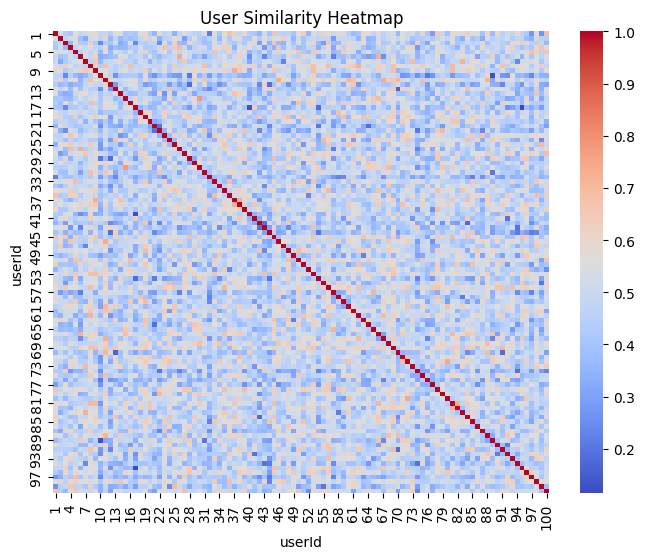

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(user_similarity_df, cmap="coolwarm")
plt.title("User Similarity Heatmap")
plt.show()

## Recommendation

In [10]:
def recommend_movies(user_id, top_n=5):

    sim_scores = user_similarity_df[user_id].sort_values(ascending=False)

    similar_users = sim_scores.index[1:6]  # top 5

    similar_ratings = user_item_matrix.loc[similar_users]

    weighted_scores = similar_ratings.mean().sort_values(ascending=False)

    user_seen = user_item_matrix.loc[user_id].dropna().index

    recommendations = weighted_scores.drop(user_seen, errors="ignore")[:top_n]

    return recommendations

print("\nTop Recommendations for User 5:")
print(recommend_movies(5))


Top Recommendations for User 5:
Movie_39    4.000000
Movie_6     3.333333
Movie_38    3.000000
Movie_20    3.000000
Movie_9     2.750000
dtype: float64
